In [1]:
%matplotlib widget
# %matplotlib ipympl

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
from statistics import mean

import util.benchmark as benchmark
import util.plotting as plotting

## Algoritmo de busqueda lineal
Tenemos la siguiente implementacion para decidir dada una lista y un elemento, si este elemento pertenece a la lista.

In [2]:
def findElement(list, elem):
    for e in list:
        if e == elem:
            return True
        
    return False

In [3]:
N = 100000
ITS = 100
Ns = list(range(1,N+1, int(N/ITS)))

### Peor caso
Este es cuando no existe el elemento que buscamos, y tenemos que buscar por toda la lista.

In [4]:
worstCases = [([e for e in range(i)], i) for i in Ns]
worstResults = benchmark.benchmarkFuncForCases(10, findElement, worstCases)

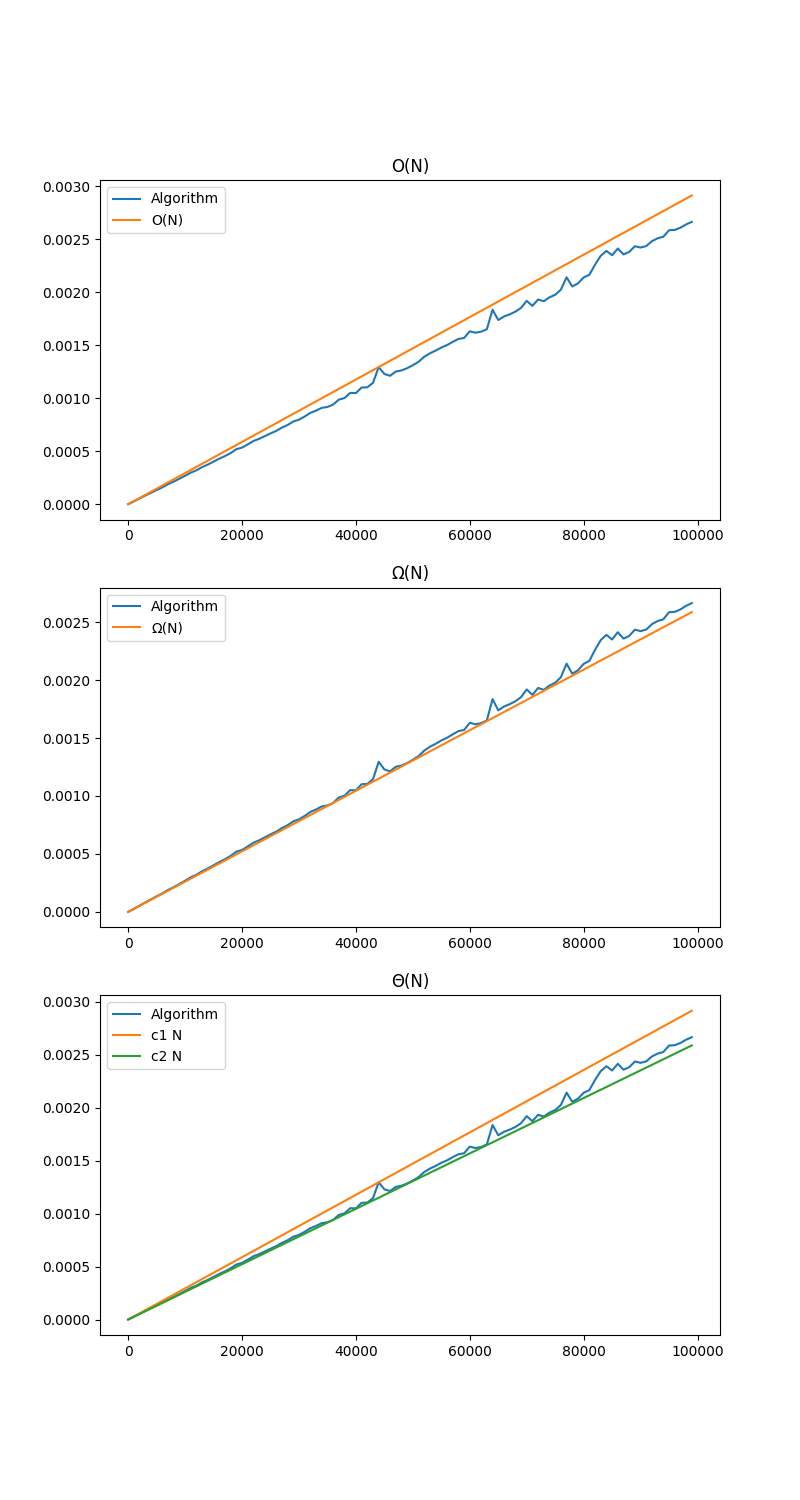

In [14]:
on = lambda list,_: len(list)

plotting.getFuncComplexityAnalysis(Ns, worstCases, worstResults, "N", on, "N", on, "N", on, 1)

### Mejor caso
El elemento que se busca es el primera de la lista.

In [10]:
bestCases = [([e for e in range(i)], 0) for i in Ns]
bestResults = benchmark.benchmarkFuncForCases(10, findElement, bestCases)

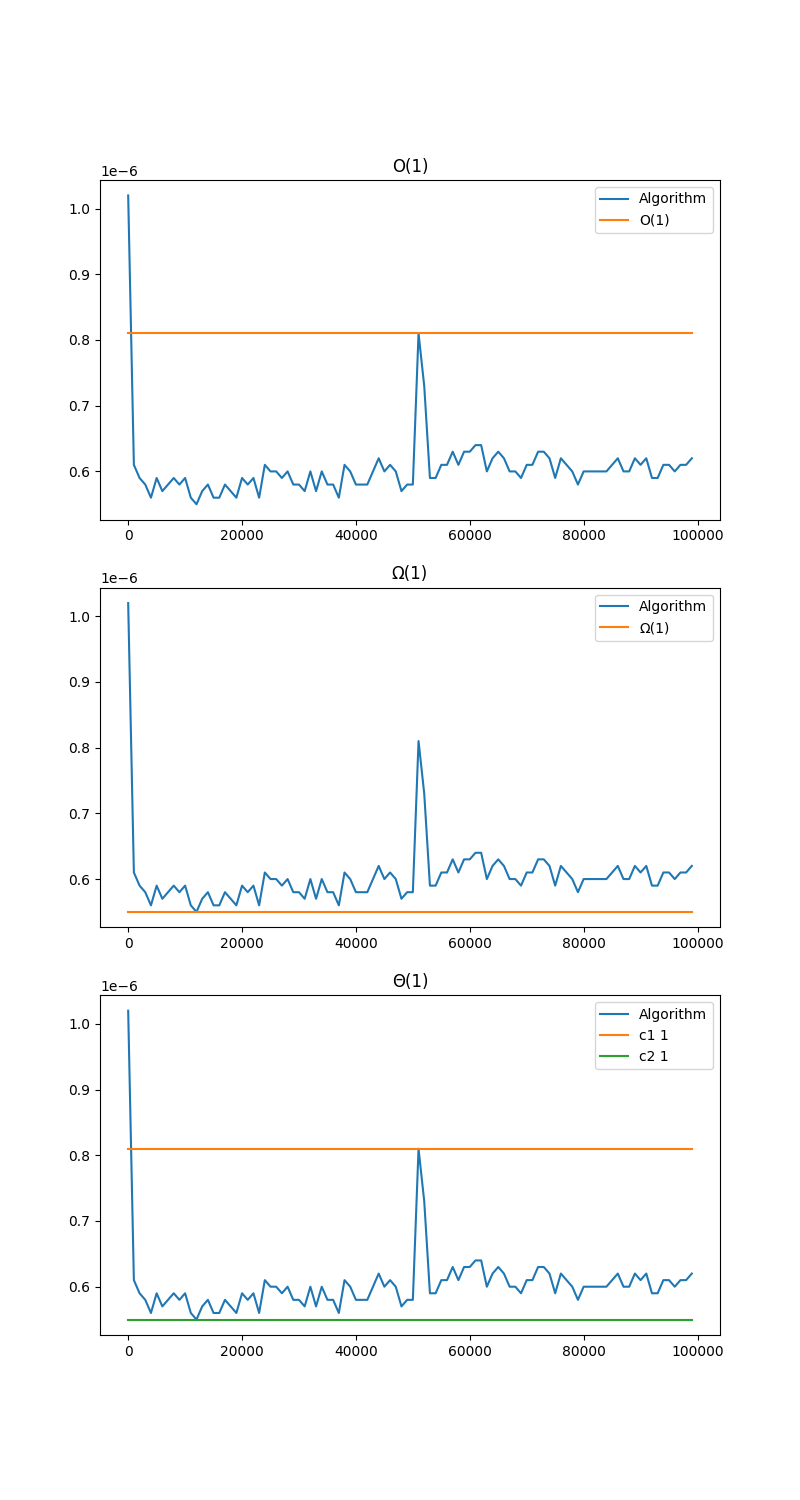

In [11]:
o1 = lambda list,_: 1

plotting.getFuncComplexityAnalysis(Ns, bestCases, bestResults, "1", o1, "1", o1, "1", o1, 1)

### Promedio
Si asumimos que el elemento que nos piden pertenece, y la distribucion de los numeros de la lista responde a una uniforme, entonces va a tender a recorre la mitad de la lista en promedio.

In [12]:
avgCases = [([e for e in range(i)], 0) for i in Ns]
avgResultsRuns = []
for _ in range(20):
    avgCasesRun = [([e for e in range(i)], random.randint(0,i)) for i in Ns]
    avgResultsRun = benchmark.benchmarkFuncForCases(10, findElement, avgCasesRun)
    
    avgResultsRuns.append(avgResultsRun)
avgResults = list(map(mean, zip(*avgResultsRuns)))

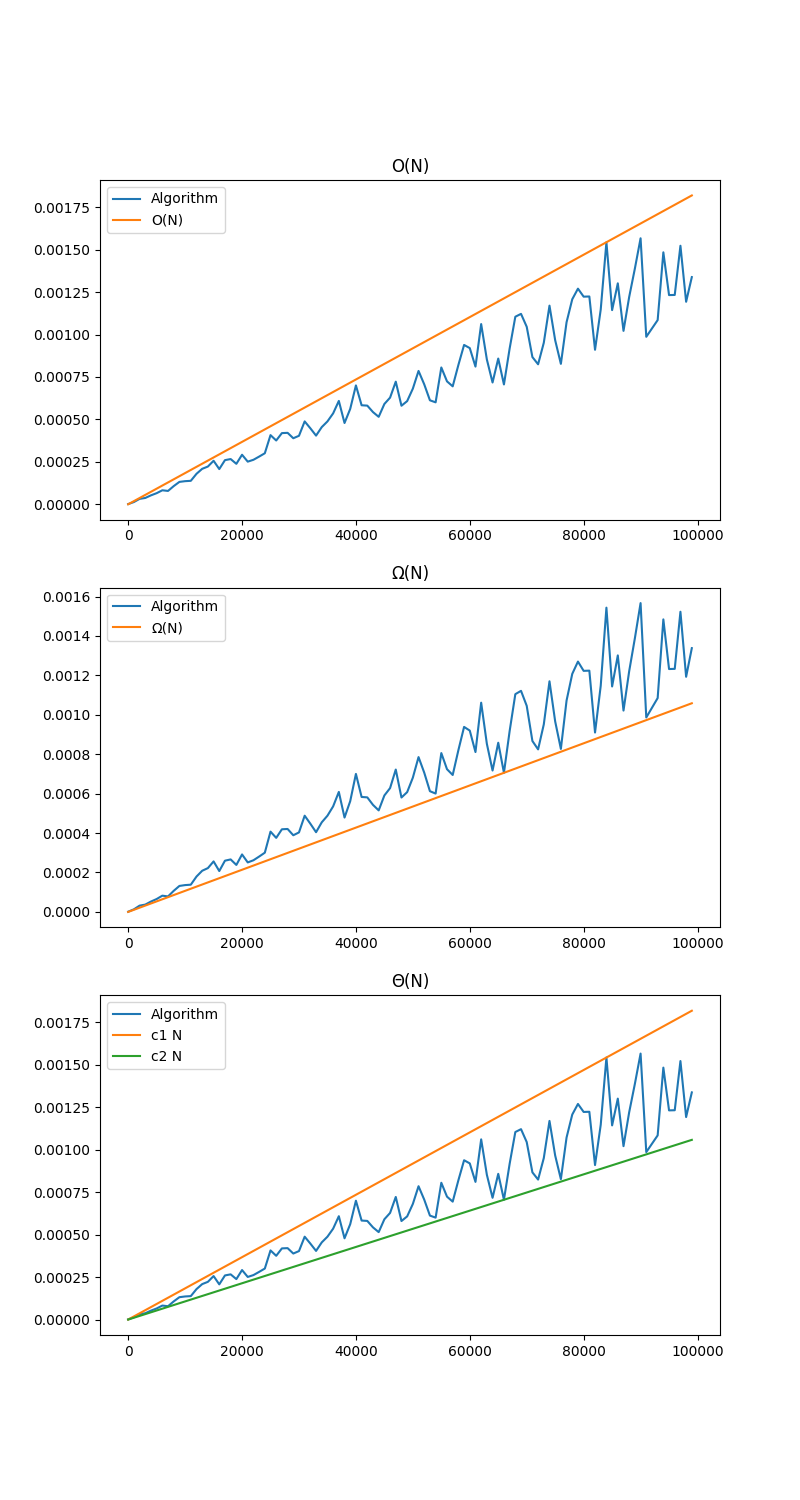

In [13]:
on = lambda list,_: len(list)

plotting.getFuncComplexityAnalysis(Ns, avgCases, avgResults, "N", on, "N", on, "N", on, 1)